In [9]:
import numpy as np
import scipy.linalg as linalg
import matplotlib.pyplot as plt

# Black Scholes Formula
$
{\frac {\partial V}{\partial t}}+{\frac {1}{2}}\sigma ^{2}S^{2}{\frac {\partial ^{2}V}{\partial S^{2}}}+rS{\frac {\partial V}{\partial S}}-rV=0
$

In [2]:
mm = 10
nn = 10

tt = np.arange(10)

print(np.arange(10))

for i in tt:
    # print(i)
    # print(i+1)
    pass

grid = np.zeros(shape=(mm+1, nn+1))

profit = 49.33 * np.exp(-0.1 * (1 - 0.01))
print(profit)
profit = 49.33 * np.exp(-0.1 * (1 - 0.99))
print(profit)

[0 1 2 3 4 5 6 7 8 9]
44.68028778680165
49.28069465678039


# Finite Difference Class
## Discretization
- S is discretized by N Steps, $\Delta s = S_{max}/N$, then it can be splited as $\{s_0, s_1, s_2, \ldots, s_M\}$ or $\{0\Delta s, 1\Delta s, 2\Delta s, \ldots, (M-1)\Delta s, M\Delta s\}$
- T is discretized by M Steps, $\Delta t = T/M$, then it can be splited as $\{t_0, t_1, t_2, \ldots, t_M\}$ or $\{0\Delta t, 1\Delta t, 2\Delta t, \ldots, (N-1)\Delta t, N\Delta t\}$
- Using i to represent each space(price) step, $\{i_0, i_1, i_2, \ldots, j_{M-1}, i_M\}$
- Using j to represent each time step: $\{j_0, j_1, j_2, \ldots, j_{N-1}, j_N\}$

In [3]:
class FiniteDifferences(object):

    def __init__(self, S0, K, r, T, sigma, Smax, M, N,
                 is_call=True):
        self.S0 = S0
        self.K = K
        self.r = r
        self.T = T
        self.sigma = sigma
        self.Smax = Smax
        self.M, self.N = int(M), int(N)  # Ensure M&N are integers
        self.is_call = is_call
        
        # calculate the discretization size of the space(price) and time
        self.dS = Smax / float(self.M)
        self.dt = T / float(self.N)
        
        # create index list
        self.i_values = np.arange(self.M)
        self.j_values = np.arange(self.N)
        
        # save all the option price at each step into a 2-D matrix
        self.grid = np.zeros(shape=(self.M+1, self.N+1))
        
        # manipulate the asset price when the discretize step
        self.boundary_conds = np.linspace(0, Smax, self.M+1)

    def _setup_boundary_conditions_(self):
        pass

    def _setup_coefficients_(self):
        pass

    def _traverse_grid_(self):
        """  Iterate the grid backwards in time """
        pass

    def _interpolate_(self):
        """
        Use piecewise linear interpolation on the initial
        grid column to get the closest price at S0.
        """
        return np.interp(self.S0, 
                         self.boundary_conds,
                         self.grid[:, 0])
        
    def price(self):
        self._setup_boundary_conditions_()
        self._setup_coefficients_()
        self._traverse_grid_()
        return (self._interpolate_(), self.grid)
    
    def print_grid(self):
        possible_prices = {}
        for j in self.j_values:
            tmp  = []
            for i in range(self.M):
                tmp.append(self.grid[i, j])
                pass
            possible_prices[j] = tmp
        return possible_prices
    
    def get_info(self):
        infos = {}
        for j in self.j_values:
            tmp  = []
            for i in range(self.M):
                info = {'asset': i*self.dS, 'time': j*self.dt, 'option': self.grid[i, j]}
                tmp.append(info)
                pass
            infos[j] = tmp
        return infos

# The Explicit Method
## Difference approximation method
- Forward Difference approximation with respect to t.
- First-order Central Difference approximation with respect to S.
- Second-Order Symmetric Central Difference approximation with respect to S.

In [4]:
""" Explicit method of Finite Differences """
class FDExplicitEu(FiniteDifferences):

    def _setup_boundary_conditions_(self):
        if self.is_call:
            # Terminal/exercise when asset price S > strike price K
            self.grid[:, -1] = np.maximum(self.boundary_conds - self.K, 0)
            # Terminal at the end of the option contract
            self.grid[-1, :-1] = (self.Smax - self.K) * np.exp(-self.r *
                                                               self.dt *
                                                               (self.N - self.j_values))
        else:
            # Terminal/exercise when asset price S > strike price K
            self.grid[:, -1] = np.maximum(self.K-self.boundary_conds, 0)
            # Terminal at the end of the option contract
            self.grid[0, :-1] = (self.K - self.Smax) * np.exp(-self.r * 
                                                              self.dt * 
                                                              (self.N - self.j_values))

    def _setup_coefficients_(self):
        self.a = 0.5 * self.dt * ((self.sigma**2) *
                                  (self.i_values**2) - 
                                  self.r * self.i_values)
        self.b = 1 - self.dt * ((self.sigma**2) * 
                                (self.i_values**2) + 
                                self.r)
        self.c = 0.5 * self.dt * ((self.sigma**2) * 
                                  (self.i_values**2) + 
                                  self.r*self.i_values)

    def _traverse_grid_(self):
        for j in reversed(self.j_values):
            for i in range(self.M)[2:]:
                self.grid[i, j] = self.a[i] * self.grid[i-1, j+1] + self.b[i] * self.grid[i, j+1] + self.c[i] * self.grid[i+1, j+1] 

In [22]:
option = FDExplicitEu(50, 50, 0.1, 1.0, 0.4, 100, 200, 10000, True)
print(option.price()[0])
prices = option.print_grid()
print(len(prices))

info = option.get_info()
print(len(info))
print(info[100][-1])
print(info[5000][-1])
print(info[9999][-1])

# for k in option.j_values:
#     print(len(prices[k]))
#     pass

9.909575362261545
10000
10000
{'asset': 99.5, 'time': 0.01, 'option': 44.98649645551197}
{'asset': 99.5, 'time': 0.5, 'option': 47.1988372630977}
{'asset': 99.5, 'time': 0.9999, 'option': 49.5005}


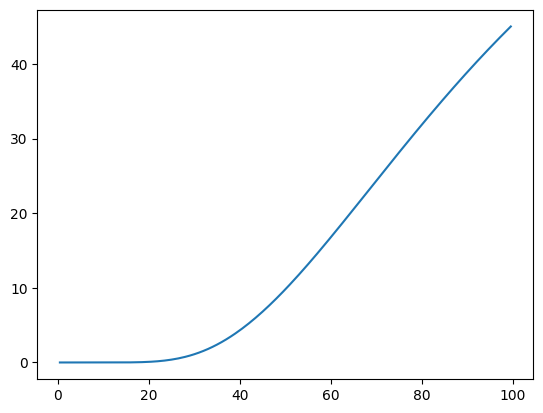

{'asset': 5.0, 'time': 0.02, 'option': 2.079503241792702e-08}
[{'asset': 0.0, 'time': 0.02, 'option': 0.0}, {'asset': 0.5, 'time': 0.02, 'option': 0.0}, {'asset': 1.0, 'time': 0.02, 'option': 2.896745590350713e-17}, {'asset': 1.5, 'time': 0.02, 'option': 2.0069562120062197e-15}, {'asset': 2.0, 'time': 0.02, 'option': 6.539644390337571e-14}, {'asset': 2.5, 'time': 0.02, 'option': 1.2334879296158288e-12}, {'asset': 3.0, 'time': 0.02, 'option': 1.5239618238793775e-11}, {'asset': 3.5, 'time': 0.02, 'option': 1.3415780976077737e-10}, {'asset': 4.0, 'time': 0.02, 'option': 8.952208842386592e-10}, {'asset': 4.5, 'time': 0.02, 'option': 4.748932399546092e-09}, {'asset': 5.0, 'time': 0.02, 'option': 2.079503241792702e-08}, {'asset': 5.5, 'time': 0.02, 'option': 7.747260768729169e-08}, {'asset': 6.0, 'time': 0.02, 'option': 2.5165715554765696e-07}, {'asset': 6.5, 'time': 0.02, 'option': 7.271797870554241e-07}, {'asset': 7.0, 'time': 0.02, 'option': 1.9001859156561567e-06}, {'asset': 7.5, 'time':

In [24]:
asset_price = []
option_price = []
for i in range(199):
    asset_price.append(info[200][i+1]['asset'])
    option_price.append(info[200][i+1]['option'])
    pass

plt.plot(asset_price, option_price)
plt.show()

print(info[200][10])
print(info[200])

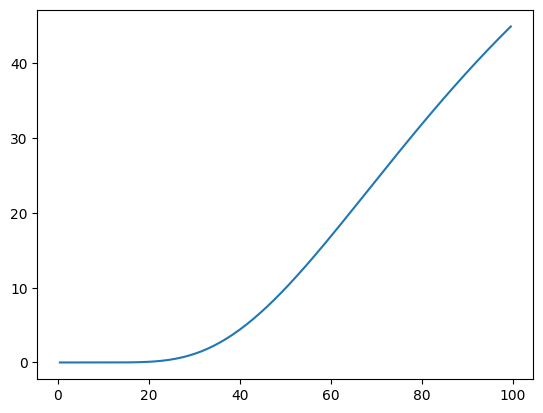

{'asset': 5.0, 'time': 0.0001, 'option': 2.9142515721984797e-08}
[{'asset': 0.0, 'time': 0.0001, 'option': 0.0}, {'asset': 0.5, 'time': 0.0001, 'option': 0.0}, {'asset': 1.0, 'time': 0.0001, 'option': 5.0454442074207785e-17}, {'asset': 1.5, 'time': 0.0001, 'option': 3.391305433657495e-15}, {'asset': 2.0, 'time': 0.0001, 'option': 1.0723537058997047e-13}, {'asset': 2.5, 'time': 0.0001, 'option': 1.964024547040479e-12}, {'asset': 3.0, 'time': 0.0001, 'option': 2.3585128106233172e-11}, {'asset': 3.5, 'time': 0.0001, 'option': 2.0206223667253113e-10}, {'asset': 4.0, 'time': 0.0001, 'option': 1.3141735633252559e-09}, {'asset': 4.5, 'time': 0.0001, 'option': 6.8057726656166184e-09}, {'asset': 5.0, 'time': 0.0001, 'option': 2.9142515721984797e-08}, {'asset': 5.5, 'time': 0.0001, 'option': 1.0634595263506213e-07}, {'asset': 6.0, 'time': 0.0001, 'option': 3.389053121702591e-07}, {'asset': 6.5, 'time': 0.0001, 'option': 9.621812837205962e-07}, {'asset': 7.0, 'time': 0.0001, 'option': 2.473769288

In [25]:
asset_price = []
option_price = []
for i in range(199):
    asset_price.append(info[1][i+1]['asset'])
    option_price.append(info[1][i+1]['option'])
    pass

plt.plot(asset_price, option_price)
plt.show()

print(info[1][10])
print(info[1])

25.332023218808438
10000
10000
[{'asset': 0.0, 'time': 0.01, 'option': -45.28713540117742}, {'asset': 0.5, 'time': 0.01, 'option': 0.0}, {'asset': 1.0, 'time': 0.01, 'option': 36.85028746640342}, {'asset': 1.5, 'time': 0.01, 'option': 42.24342935081562}, {'asset': 2.0, 'time': 0.01, 'option': 42.90582322626495}, {'asset': 2.5, 'time': 0.01, 'option': 42.67941056150666}, {'asset': 3.0, 'time': 0.01, 'option': 42.25326737959314}, {'asset': 3.5, 'time': 0.01, 'option': 41.77550946897674}, {'asset': 4.0, 'time': 0.01, 'option': 41.28283496645337}, {'asset': 4.5, 'time': 0.01, 'option': 40.78543524339153}, {'asset': 5.0, 'time': 0.01, 'option': 40.28641901698732}, {'asset': 5.5, 'time': 0.01, 'option': 39.78681233341768}, {'asset': 6.0, 'time': 0.01, 'option': 39.28697748713111}, {'asset': 6.5, 'time': 0.01, 'option': 38.78705022829124}, {'asset': 7.0, 'time': 0.01, 'option': 38.28708438061958}, {'asset': 7.5, 'time': 0.01, 'option': 37.78710280684949}, {'asset': 8.0, 'time': 0.01, 'option'

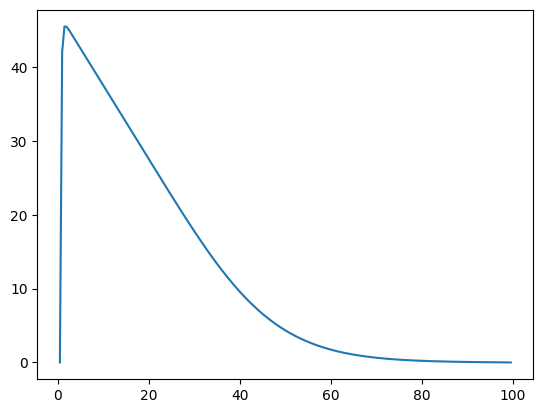

{'asset': 5.0, 'time': 0.01, 'option': 40.28641901698732}
{'asset': 5.0, 'time': 0.5, 'option': 42.56144982509633}
{'asset': 5.0, 'time': 0.9999, 'option': 44.9995}


In [15]:
option1 = FDExplicitEu(20, 50, 0.1, 1.0, 0.4, 100, 200, 10000, False)
print(option1.price()[0])
prices = option1.print_grid()
print(len(prices))

info1 = option1.get_info()
print(len(info1))
print(info1[100])

asset_price = []
option_price = []
for i in range(199):
    asset_price.append(info1[100][i+1]['asset'])
    option_price.append(info1[100][i+1]['option'])
    pass

plt.plot(asset_price, option_price)
plt.show()

print(info1[100][10])
print(info1[5000][10])
print(info1[9999][10])

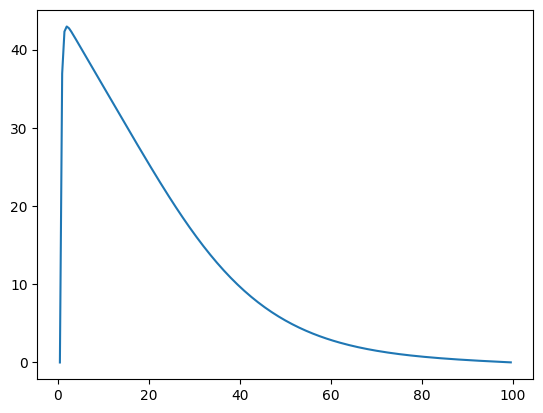

{'asset': 5.0, 'time': 0.02, 'option': 40.33176780132819}


In [17]:
asset_price = []
option_price = []
for i in range(199):
    asset_price.append(info1[200][i+1]['asset'])
    option_price.append(info1[200][i+1]['option'])
    pass

plt.plot(asset_price, option_price)
plt.show()

print(info1[200][10])

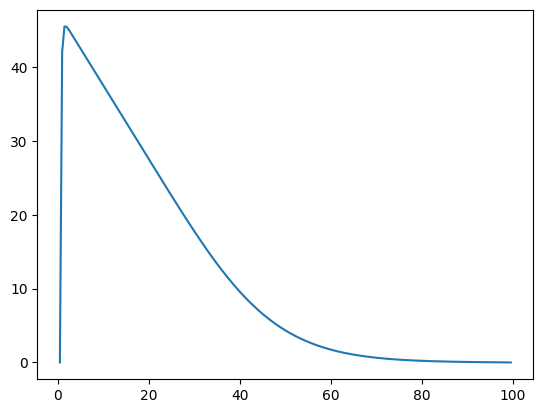

{'asset': 5.0, 'time': 0.5, 'option': 42.56144982509633}


In [19]:
asset_price = []
option_price = []
for i in range(199):
    asset_price.append(info1[5000][i+1]['asset'])
    option_price.append(info1[5000][i+1]['option'])
    pass

plt.plot(asset_price, option_price)
plt.show()

print(info1[5000][10])

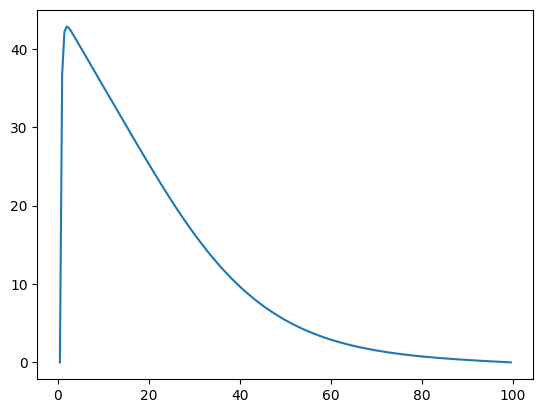

{'asset': 5.0, 'time': 0.0, 'option': 40.241113794029566}


In [21]:
asset_price = []
option_price = []
for i in range(199):
    asset_price.append(info1[0][i+1]['asset'])
    option_price.append(info1[0][i+1]['option'])
    pass

plt.plot(asset_price, option_price)
plt.show()

print(info1[0][10])